In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

menu_data = pd.read_csv('/content/XTern 2024 Artificial Intelegence Data Set - Menu.csv')
# print(menu_data)

train_data = pd.read_csv('/content/XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv')
# train_data.head()

merged_data = pd.merge(train_data,menu_data[['Price','Calories','Item']],left_on = 'Order', right_on='Item', how = 'left')
merged_data.head()

,Year,Major,University,Time,Order,Price,Calories,Item
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket,10,600,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie,4,450,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili,7,300,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket,10,600,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...,3,150,Indiana Corn on the Cob (brushed with garlic b...


# Exploratory Data Analysis


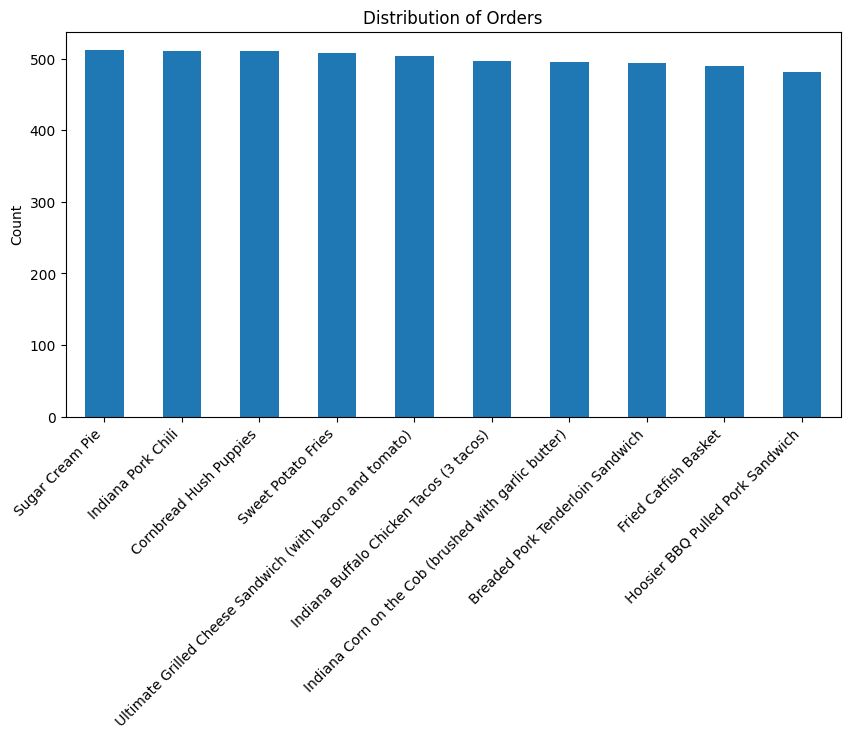

In [16]:
# Distribution of orders
plt.figure(figsize=(10, 5))
merged_data["Order"].value_counts().plot(kind='bar')
plt.title("Distribution of Orders")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()


From the above distrubution we can observe that all the orders are equally popular and that the students (overall) are not biased towards any item.

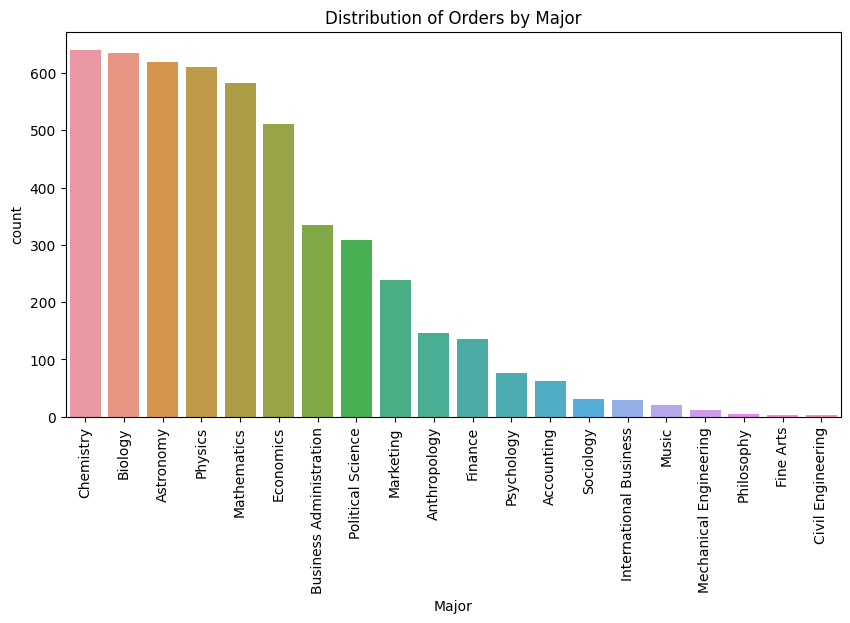

In [20]:
# Visualizing distribution of orders for different categories

# Calculate the order in which majors should be displayed
major_order = merged_data['Major'].value_counts().index

# Create the plot
plt.figure(figsize=(10,5))
sns.countplot(data=merged_data, x='Major', order=major_order)
plt.xticks(rotation=90)
plt.title('Distribution of Orders by Major')
plt.show()

Students from a few majors have placed more orders and the ones from other majors have placed less orders.

*   The top 5 Majors are - Chemistry, Biology, Astronomy, Physics,Mathematics.
*   We can focus out promotional strategies to focus on the students from the top ordering Majors
*   We can also look into uderstanding why students from a few majors don't buy food from food trucks and propose ways to increase their number


---



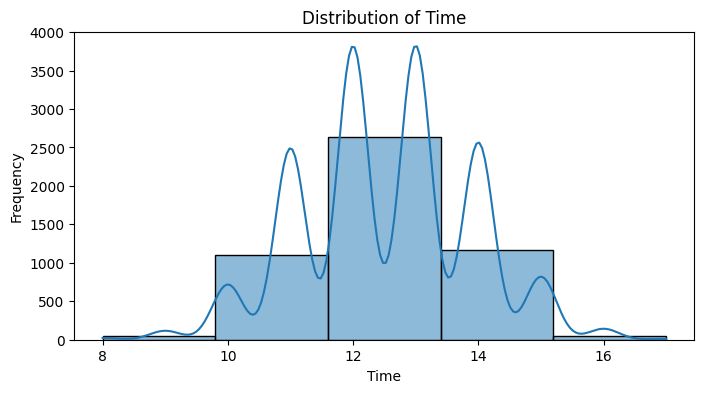

In [24]:
# Distribution of Time
plt.figure(figsize=(8, 4))
sns.histplot(merged_data['Time'], bins=5, kde=True)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Distribution of Time')
plt.show()

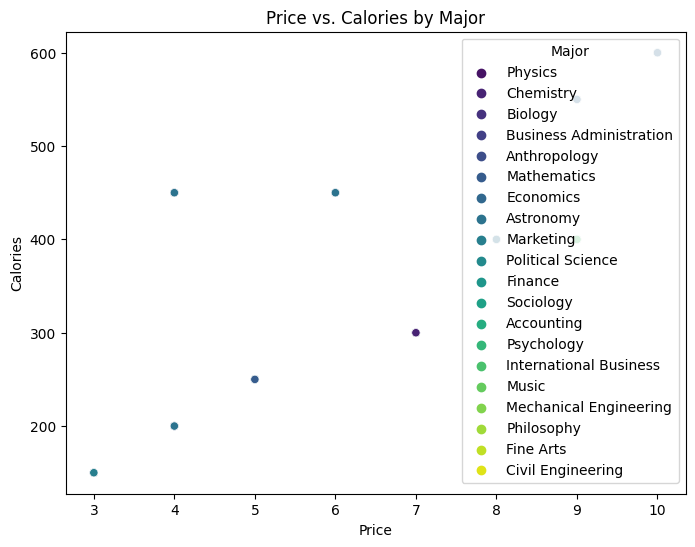

In [26]:
# This scatter plot shows the relationship between the price and calories of different food items, colored by major.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_data, x='Price', y='Calories', hue='Major', palette='viridis')
plt.xlabel('Price')
plt.ylabel('Calories')
plt.title('Price vs. Calories by Major')
plt.legend(title='Major', loc='upper right')
plt.show()


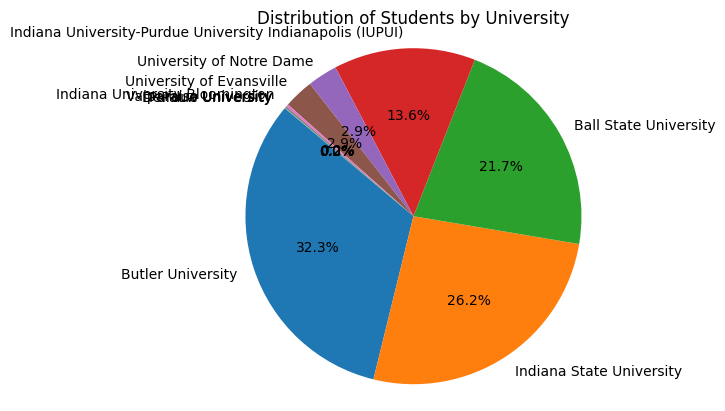

In [28]:
# University Pie charts
university_counts = merged_data['University'].value_counts()
plt.pie(university_counts, labels=university_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Students by University')
plt.axis('equal')
plt.show()


Butler University students contribute to most orders followed by Indiana State University and Ball State University. These Universities give 80% of business so we can target these better.

<ipython-input-27-907e11314e4a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm')


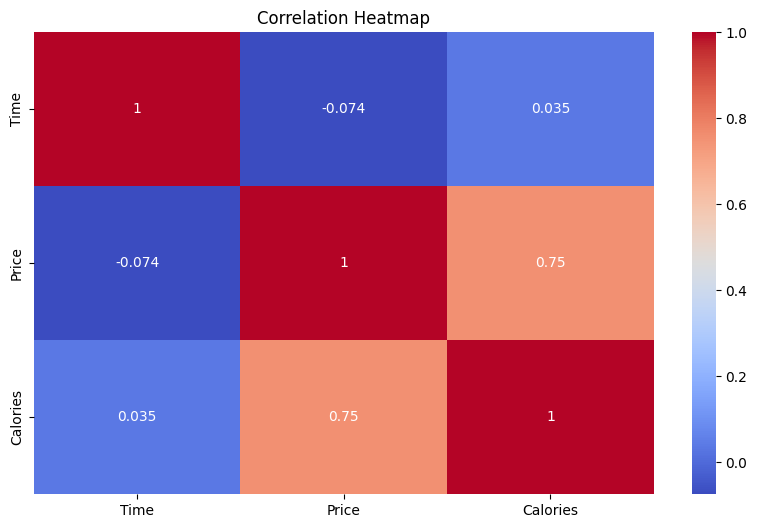

In [27]:
# Correlation between college experience factors and food choices
plt.figure(figsize=(10, 6))
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Consider implications of data collection, storage, and data biases you would consider relevant here considering Data Ethics, Business Outcomes, and Technical Implications



Data Collection:

Data Privacy: Compliance with data privacy regulations, such as GDPR and HIPAA, is paramount. We must institute explicit user consent mechanisms and implement robust encryption protocols to ensure the security of personal data.

Data Security: A multi-layered approach to data security is essential, incorporating end-to-end encryption, access controls, and regular penetration testing to mitigate vulnerabilities.

Data Quality: The quality of our training data directly impacts the efficacy of our AI model. Employing data preprocessing techniques, including data validation, imputation, and outlier detection, is crucial for maintaining data integrity.

Data Storage:

Data Retention: To align with data retention policies and best practices, we'll establish clear protocols for the storage duration of user data. Regular data purging and backup procedures should be in place.

Anonymization: The application of advanced anonymization methods like k-anonymity and differential privacy ensures that sensitive data remains confidential, even in the event of a breach.

Data Localization: In compliance with data sovereignty laws, data localization strategies will be determined, including geographical considerations and redundancy measures to enhance data reliability.

Data Biases:

Bias in Training Data: Employing data rebalancing techniques, such as oversampling underrepresented groups or re-weighting, is pivotal to addressing potential biases within our training dataset.

Algorithmic Bias: Routine fairness assessments using metrics like equal opportunity and demographic parity will help identify and mitigate algorithmic biases in our AI predictions.

Business Outcomes:

User Experience: To optimize the user experience, the selection of neural networks over recurrent neural networks (RNNs), particularly deep feedforward or convolutional neural networks (CNNs), offers enhanced order prediction precision. These networks excel at capturing intricate patterns in user order histories, leading to more personalized recommendations.

Revenue and Profitability: Cost-sensitive models will be developed to fine-tune inventory management and reduce food waste, resulting in improved profitability.

Customer Engagement: Utilizing recommendation algorithms like collaborative filtering will enable personalized promotions and offers, elevating customer engagement and loyalty.

Technical Implications:

AI Model Development: Leveraging machine learning frameworks, such as TensorFlow or PyTorch, we'll streamline AI model development and training. Regular model updates and refinements will be integral to sustaining predictive accuracy.

Scalability: The adoption of cloud platforms, such as AWS, Azure, or Google Cloud, will enable auto-scaling, ensuring our system remains responsive to increased user demand.

Real-time Processing: Implementing stream processing systems, such as Apache Kafka, alongside real-time databases, will facilitate rapid order predictions and seamless user experiences.

Integration: A microservices architecture and RESTful APIs will underpin our integration strategy, guaranteeing the seamless compatibility of our AI system with the FoodX app and order processing workflow.

In conclusion, our AI-driven order prediction system, underpinned by data ethics, technical expertise, and a focus on business outcomes, promises to be a valuable asset, enhancing customer satisfaction and operational efficiency for FoodX.

# Model Building

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

# Data Preparation
df_encoded = pd.get_dummies(merged_data[['Year', 'Major', 'University','Order']], columns=['Year', 'Major', 'University'])
X = df_encoded.drop('Order', axis=1)
y = df_encoded['Order']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model Training
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Testing
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# # Pickling the model
# with open('model.pkl', 'wb') as model_file:
#     pickle.dump(clf, model_file)


Accuracy: 0.506


In [29]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train, y_train)
# Testing
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.492


In [30]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
# Testing
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.471


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
# Testing
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

In [32]:
# Basic Neural Netwrok
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pickle

# Data Preparation
df_encoded = pd.get_dummies(merged_data[['Year', 'Major', 'University', 'Order']], columns=['Year', 'Major', 'University'])
X = df_encoded.drop('Order', axis=1)
y = df_encoded['Order']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model Training with Different Configuration
clf = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Experiment with different layers and neurons
    max_iter=1000,
    random_state=1,
    learning_rate_init=0.001,  # Adjust learning rate
    alpha=0.001,  # Add regularization
    activation='relu'  # Try different activation functions
)
clf.fit(X_train, y_train)

# Testing
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Save the trained model to a file using pickle
with open('improved_neural_network_model.pkl', 'wb') as model_file:
    pickle.dump(clf, model_file)

Accuracy: 0.505


# Other Ideas to Improve Accuracy
In our ongoing efforts to enhance the performance of our model, we recognize the pivotal importance of the "times" column. To this end, we have outlined a comprehensive roadmap for future development that encompasses several critical strategies and techniques.

1. *Incorporating the "Times" Column*: We acknowledge that the inclusion of the "times" column is paramount for the model's advancement. This addition will not only bolster our model's predictive power but also provide a more holistic understanding of the underlying data.

2. *Transfer Learning*: We are committed to harnessing the potential of transfer learning. By leveraging pre-trained models and fine-tuning them on our specific tasks, we aim to significantly boost the model's capacity to handle complex patterns and relationships within the data.

3. *Neural Network Improvements*:
    a. *Batch Normalization*: We intend to introduce batch normalization layers within our neural network architecture. This technique will enhance training stability, mitigate the vanishing/exploding gradient problem, and expedite convergence, ultimately resulting in a more robust model.
    
    b. *Proper Initialization Techniques*: The importance of proper weight initialization techniques cannot be understated. We are dedicated to implementing methods like He initialization or Xavier/Glorot initialization to ensure that our neural networks start with optimized weights, enhancing learning efficiency and generalization.

4. *Ensemble Learning*: Recognizing the strength in diversity, we plan to explore ensemble learning. By combining multiple models, each with distinct strengths and weaknesses, we can enhance the model's overall predictive accuracy. Techniques like bagging, boosting, or stacking will be employed to leverage the collective wisdom of multiple models.

5. *Hyperparameter Tuning*: A critical aspect of model refinement involves diligent hyperparameter tuning. We will systematically explore various hyperparameters, such as learning rates, regularization strengths, and architecture-specific parameters. Grid search, random search, or Bayesian optimization will be employed to identify the optimal configuration.

6. *Iterative Model Refinement*: Continuous monitoring, evaluation, and model iteration will be central to our approach. Regular performance assessments will guide us in adapting our strategies and techniques to ever-evolving data and requirements.

In summary, our forward-looking strategy involves a multi-pronged approach that prioritizes data inclusion, advanced techniques, and model optimization. Through the judicious application of these methods, we aim to achieve a significant enhancement in our model's predictive capabilities and overall performance.

# To Bring it to Maturity
1. Business Viability:

Market Research: Check out if people really want an AI that predicts their food truck orders. Make sure it's something that fits with what customers like and want.

Cost-Benefit Analysis: Think about how much it will cost to make this AI system and compare that with how much extra money it might make. Is it worth it?

2. Technical Feasibility:

Data Availability: Figure out if we can actually get the data we need for this AI system. Do we have the right information, and can we handle it?

Infrastructure and Resources: Look at what we've got in terms of computers, storage, and people who can do the work. Do we have what we need?

3. Ethical and Legal Considerations:

Data Ethics: Make sure we're doing the right thing with people's information. Keep an eye on the rules and laws about data privacy.

Bias and Fairness: We need to be fair and square with our AI. Check that it doesn't favor some people over others and fix it if it does.

4. Performance and Accuracy:

Model Validation: Test our AI system really well to make sure it's good at predicting orders. Try it out in real life and see how it performs.

Scalability: Make sure our system can handle more and more users without slowing down or messing up.

5. User Adoption and Experience:

User Acceptance: See if people like the idea of an AI predicting their orders. Get their thoughts and what they prefer.

User Experience: Check how well the AI system works in real life. Is it making orders more accurate, and are customers happy?

6. Competition and Differentiation:

Competitive Analysis: Look at what other businesses are doing. If they've got something similar, we need to find a way to stand out.
7. Return on Investment (ROI):

ROI Analysis: Check if spending money on the AI is worth it. Will it make us more money than it costs?
8. Regulatory Compliance:

Regulatory Landscape: Stay informed about any industry-specific rules and follow them closely.
9. Sustainability and Long-Term Vision:

Sustainability: Think about how well this AI will work in the long run. Can it change with the times?
10. Risk Mitigation:

Risk Assessment: Find out what could go wrong and make a plan to stop it or fix it if it happens.
11. Customer Feedback:

Pilot Testing: Try it out on a small group of customers first to see what they think.
12. Alignment with Strategic Goals:

Strategic Fit: Make sure this AI fits with what FoodX wants to do in the future. Does it help us grow and be better?
So, the decision to go ahead with the AI order prediction system depends on a mix of these things. It's all about balancing what makes sense for our business, our customers, and our long-term plans